In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image processing modules
from PIL import Image
import cv2
# for Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf

## Generating the Training dataset and image data from the image in the uninfected  and infected training DataFrame

### Training data

In [2]:
# load training data from csv
train_path = os.path.join('..','this_way','eda_train_uninfect.csv')
train_eda_uninf_df = pd.read_csv(train_path)

In [3]:
# Showing first 5 rows of the dataset
train_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Uninfected_Edge_Density,Uninfected_MeanBlobSize,Uninfected_MaxBlobSize
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.0,1.0
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.0,1.0
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.0,0.0
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.0,0.0
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.0,2.0


In [4]:
# creating a column in the dataframe for a column target of value 0 to uninfected dataset, uninfected =0 
train_eda_uninf_df["Target"]= 0 

In [5]:
train_eda_uninf_df.rename(columns={
    'ImageFileName': 'ImageFileName',
    'Uninfected_Edge_Density': 'Edge_Density',
    'Uninfected_MeanBlobSize': 'MeanBlobSize',
    'Uninfected_MaxBlobSize': 'MaxBlobSize',
    'Red_Channel_Distribution': 'Red_Channel_Distribution',
    'Green_Channel_Distribution': 'Green_Channel_Distribution',
    'Blue_Channel_Distribution': 'Blue_Channel_Distribution',
    'Target': 'Target'
}, inplace=True)

In [6]:
train_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.0,1.0,0
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.0,1.0,0
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.0,0.0,0
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.0,0.0,0
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.0,2.0,0


In [7]:
#checking length of the dataset
len(train_eda_uninf_df)

1750

In [8]:
# reading the training EDA data from the csv 
train_eda_inf_df = pd.read_csv('../this_way/eda_train_infect.csv')

In [9]:
# creating a column target of value 1 to uninfected dataset, infected = 1
train_eda_inf_df["Target"]= 1

In [10]:
train_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Infected_Edge_Density,Infected_MeanBlobSize,Infected_MaxBlobSize,Target
0,C100P61ThinF_IMG_20150918_144104_cell_162.png,163.5904,119.1104,119.3664,0.1744,1.333333,2.0,1
1,C100P61ThinF_IMG_20150918_144104_cell_164.png,164.2032,119.9104,116.0448,0.1696,0.000000,0.0,1
2,C100P61ThinF_IMG_20150918_144104_cell_165.png,137.8736,104.5488,100.8528,0.1680,1.500000,2.0,1
3,C100P61ThinF_IMG_20150918_144104_cell_167.png,149.5360,110.4432,105.2560,0.1840,1.333333,2.0,1
4,C100P61ThinF_IMG_20150918_144104_cell_168.png,158.2176,113.8064,109.9968,0.1696,1.000000,1.0,1


In [11]:
train_eda_inf_df.rename(columns={
    'ImageFileName': 'ImageFileName',
    'Infected_Edge_Density': 'Edge_Density',
    'Infected_MeanBlobSize': 'MeanBlobSize',
    'Infected_MaxBlobSize': 'MaxBlobSize',
    'Red_Channel_Distribution': 'Red_Channel_Distribution',
    'Green_Channel_Distribution': 'Green_Channel_Distribution',
    'Blue_Channel_Distribution': 'Blue_Channel_Distribution',
    'Target': 'Target'
}, inplace=True)

In [12]:
# Define the path to the folder containing your images
folder_path = os.path.join('..', 'this_way', 'clean', 'train', 'infected_processed')

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]  # Adjust the file extension as needed

# Initialize empty lists to store image pixel data for different rotations and unrotated images
left_rotated_pixels_list = []
right_rotated_pixels_list = []
rotated_180_pixels_list = []
original_pixels_list = []

# Iterate through each image file
for image_file in image_files:
    # Open the image using PIL
    image = Image.open(os.path.join(folder_path, image_file))

    # Rotate the image 90 degrees to the left (counter-clockwise)
    left_rotated_image = image.rotate(90, expand=True)

    # Rotate the image 90 degrees to the right (clockwise)
    right_rotated_image = image.rotate(-90, expand=True)

    # Rotate the image 180 degrees
    rotated_180_image = image.rotate(180, expand=True)

    # Convert the rotated images to NumPy arrays
    left_rotated_array = np.array(left_rotated_image)
    right_rotated_array = np.array(right_rotated_image)
    rotated_180_array = np.array(rotated_180_image)

    # Flatten the arrays to 1D arrays (lists of pixel values)
    left_rotated_pixels = left_rotated_array.flatten()
    right_rotated_pixels = right_rotated_array.flatten()
    rotated_180_pixels = rotated_180_array.flatten()

    # Convert the original image to a NumPy array and flatten it
    original_array = np.array(image)
    original_pixels = original_array.flatten()

    # Append the pixel values to the respective lists
    left_rotated_pixels_list.append(left_rotated_pixels)
    right_rotated_pixels_list.append(right_rotated_pixels)
    rotated_180_pixels_list.append(rotated_180_pixels)
    original_pixels_list.append(original_pixels)

# Create DataFrames for left, right, 180-degree rotated, and original images
left_rotated_df = pd.DataFrame(left_rotated_pixels_list)
right_rotated_df = pd.DataFrame(right_rotated_pixels_list)
rotated_180_df = pd.DataFrame(rotated_180_pixels_list)
original_df = pd.DataFrame(original_pixels_list)

# merging the various dataframes 
train_inf_pixel = pd.concat([original_df,left_rotated_df,right_rotated_df,rotated_180_df],axis=0)

In [13]:
train_inf_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
len(train_inf_pixel)

7000

In [15]:
# Normalize the data in the training infected pixel database 
train_inf_pixel = train_inf_pixel/255

# Engineering a column named 'Target' in the infected training dataframe and assigning the value 1
train_inf_pixel['Target']= 1

In [16]:
train_inf_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [17]:
# Define the path to the folder containing your images
folder_path = os.path.join('..', 'this_way', 'clean', 'train', 'uninfected_processed')

# List all image files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith('.png')]  # Adjust the file extension as needed

# Initialize empty lists to store image pixel data for different rotations and unrotated images
left_rotated_pixels_list = []
right_rotated_pixels_list = []
rotated_180_pixels_list = []
original_pixels_list = []

# Iterate through each image file
for image_file in image_files:
    # Open the image using PIL
    image = Image.open(os.path.join(folder_path, image_file))

    # Rotate the image 90 degrees to the left (counter-clockwise)
    left_rotated_image = image.rotate(90, expand=True)

    # Rotate the image 90 degrees to the right (clockwise)
    right_rotated_image = image.rotate(-90, expand=True)

    # Rotate the image 180 degrees
    rotated_180_image = image.rotate(180, expand=True)

    # Convert the rotated images to NumPy arrays
    left_rotated_array = np.array(left_rotated_image)
    right_rotated_array = np.array(right_rotated_image)
    rotated_180_array = np.array(rotated_180_image)

    # Flatten the arrays to 1D arrays (lists of pixel values)
    left_rotated_pixels = left_rotated_array.flatten()
    right_rotated_pixels = right_rotated_array.flatten()
    rotated_180_pixels = rotated_180_array.flatten()

    # Convert the original image to a NumPy array and flatten it
    original_array = np.array(image)
    original_pixels = original_array.flatten()

    # Append the pixel values to the respective lists
    left_rotated_pixels_list.append(left_rotated_pixels)
    right_rotated_pixels_list.append(right_rotated_pixels)
    rotated_180_pixels_list.append(rotated_180_pixels)
    original_pixels_list.append(original_pixels)

# Create DataFrames for left, right, 180-degree rotated, and original images
left_rotated_df = pd.DataFrame(left_rotated_pixels_list)
right_rotated_df = pd.DataFrame(right_rotated_pixels_list)
rotated_180_df = pd.DataFrame(rotated_180_pixels_list)
original_df = pd.DataFrame(original_pixels_list)


In [18]:
# merging the various dataframes 
train_uninf_pixel = pd.concat([original_df,left_rotated_df,right_rotated_df,rotated_180_df],axis=0)

In [19]:
train_uninf_pixel.head()

,0,1,2,3,4,5,6,7,8,9,...,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
len(train_uninf_pixel)

7000

In [21]:
# Normalize the data in the training uninfected pixel database 
train_uninf_pixel = train_uninf_pixel/255

## Engineering a column named 'Target' in the infected training dataframe and assigning the value 0
train_uninf_pixel["Target"]= 0

In [22]:
# concatenating the 2 infected and uninfeacted trained data frame containing pixel data done for ML
train_df = pd.concat([train_inf_pixel,train_uninf_pixel],axis = 0)

In [23]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,1866,1867,1868,1869,1870,1871,1872,1873,1874,Target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1745,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.12549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [24]:
# Splitting the training data, data to X_train and y_train 
X = train_df.drop(columns = "Target").values
y = train_df['Target'].values


In [25]:
# reshaping the X_train data into shape (-1,25,25,3)
X = X.reshape(-1,25,25,3)

In [26]:
# reshaping the array to fit into a CNN ML model
X.shape

(14000, 25, 25, 3)

In [27]:
len(y)

14000

In [28]:
# Split the dataset into train, validation, and test sets
from sklearn.model_selection import train_test_split

# To split the data into training, validating and testing datasets - 2 steps are required
# First, split the data into a temporary set (X_temp, X_test, y_temp, y_test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the temporary set into training and validation sets (X_train, X_val, y_train, y_val)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Import the necessary library for L2 regularization
from tensorflow.keras.regularizers import l2,l1

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(25, 25, 3), kernel_regularizer=tf.keras.regularizers.l1(0.05)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model by setting paramteres and metrics
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

# Print a summary of the model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 23, 23, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 32)          4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 16)          0

In [29]:

# Train your machine learning model and collect the training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
263/263 [==============================] - 8s 27ms/step - loss: 1.2001 - accuracy: 0.6094 - val_loss: 0.7244 - val_accuracy: 0.5889
Epoch 2/50
263/263 [==============================] - 5s 18ms/step - loss: 0.6417 - accuracy: 0.7223 - val_loss: 0.6265 - val_accuracy: 0.7589
Epoch 3/50
263/263 [==============================] - 4s 14ms/step - loss: 0.5649 - accuracy: 0.7669 - val_loss: 0.5426 - val_accuracy: 0.7711
Epoch 4/50
263/263 [==============================] - 4s 14ms/step - loss: 0.5369 - accuracy: 0.7751 - val_loss: 0.5591 - val_accuracy: 0.7446
Epoch 5/50
263/263 [==============================] - 3s 13ms/step - loss: 0.5092 - accuracy: 0.7951 - val_loss: 0.4745 - val_accuracy: 0.7968
Epoch 6/50
263/263 [==============================] - 4s 14ms/step - loss: 0.4573 - accuracy: 0.8224 - val_loss: 0.4336 - val_accuracy: 0.8321
Epoch 7/50
263/263 [==============================] - 4s 13ms/step - loss: 0.4123 - accuracy: 0.8448 - val_loss: 0.3860 - val_accuracy: 0.8489

### From the above output it is evident that using this CNN model the accuracy of the model is 100 x the value indicated in the Test Accuracy. Owing that the domain we are working in is Medical, it is imperative that the accuracy be as high as possible

### Visualizing how the model learns and where the loss and accuracy lie with respect to training and validation datasets

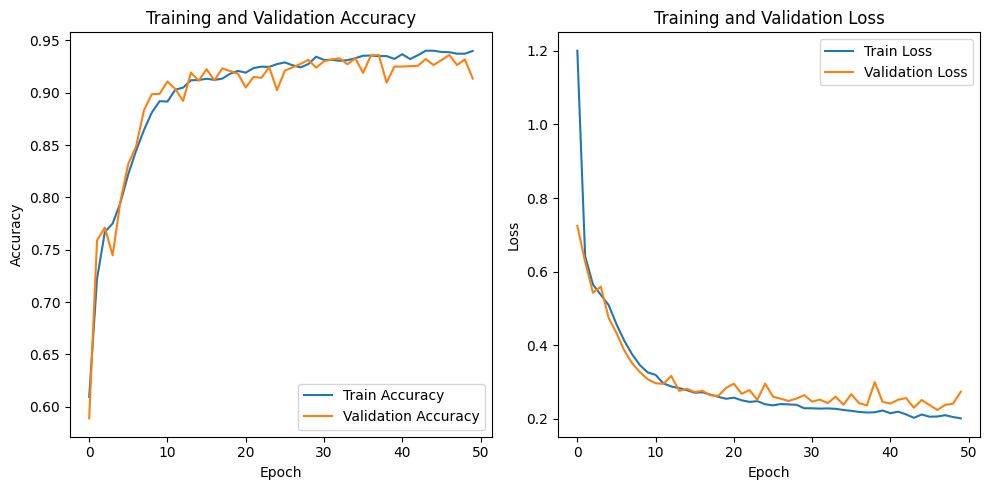

In [30]:
# Visualize the training history w.r.t to 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

### The Graphs show that the Accuracy and Loss with both training and validation datasets are very close to each other which is what we need as the model shouldnt be overfitting or underfitting. In order to overcome the overfitting problems, a technique regularization was used to minimize this issue

### Once the model is trained and validated, it is ready to use to check if it can help in classifying and giving you the answer to your question, which in our case is is the given image infected or uninfected?

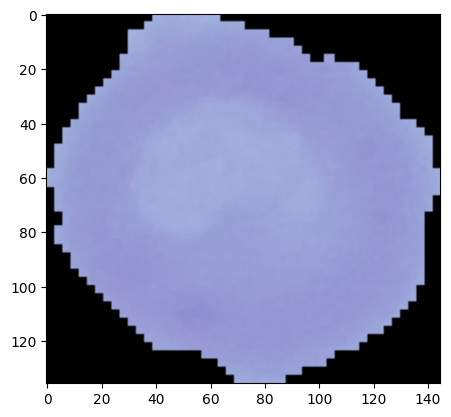

In [31]:
# using the cv2 module of python, reading an image that needs to be classified. 
img = cv2.imread('../new_direction/Dataset/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_131.png')

# displaying the image using the matplotlib module
plt.imshow(img) 
plt.show()

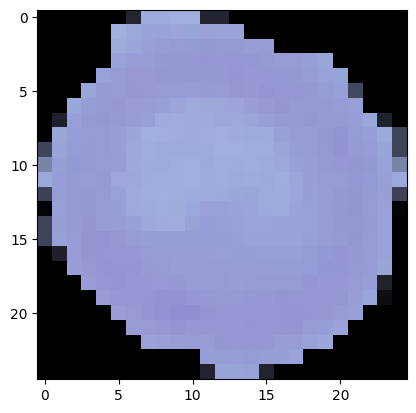

In [32]:
# Resizing the image to size 25x25 pixels so that it can be used by model.
resize = tf.image.resize(img, (25,25))

#verifying that image has not undergone any transformation due to shrinking of the image
plt.imshow(resize.numpy().astype(int))
plt.show()

### From the image it is evident that the boxes are clearly visible in the iamge, this is the result of reduction in detail in the image due to reduction of pixels

In [33]:
# predict the value using the CNN model and assigning it to a variable
predict_value = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 151ms/step


In [34]:
#value in array format
predict_value

array([[0.17329225]], dtype=float32)

In [35]:
# classifying the image where if value is less than 0.5 it is uninfected and greater than 0.5 it is infected
if predict_value < 0.5: 
    print(f'Predicted class is uninfected')
else:
    print(f'Predicted class is Infected')

Predicted class is uninfected


In [36]:
# saving the CNN model to a HDF5 file.
model.save('CNN_model.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Now that we have classified image on CNN model using the pixels of an image, we need to see if we can classify an image based on the EDA data that we have obtained from the image file.

### To analyze the EDA data and use it to predict whether the input image is infected or uninfected we are using the Random Forest Algorthim.

In [37]:
train_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target
0,C100P61ThinF_IMG_20150918_144104_cell_162.png,163.5904,119.1104,119.3664,0.1744,1.333333,2.0,1
1,C100P61ThinF_IMG_20150918_144104_cell_164.png,164.2032,119.9104,116.0448,0.1696,0.000000,0.0,1
2,C100P61ThinF_IMG_20150918_144104_cell_165.png,137.8736,104.5488,100.8528,0.1680,1.500000,2.0,1
3,C100P61ThinF_IMG_20150918_144104_cell_167.png,149.5360,110.4432,105.2560,0.1840,1.333333,2.0,1
4,C100P61ThinF_IMG_20150918_144104_cell_168.png,158.2176,113.8064,109.9968,0.1696,1.000000,1.0,1


In [38]:
train_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target
0,C100P61ThinF_IMG_20150918_144104_cell_128.png,146.5920,108.2592,102.9936,0.1408,1.0,1.0,0
1,C100P61ThinF_IMG_20150918_144104_cell_131.png,155.7472,115.0592,110.2320,0.1328,1.0,1.0,0
2,C100P61ThinF_IMG_20150918_144104_cell_144.png,158.4128,117.5648,112.1712,0.1344,0.0,0.0,0
3,C100P61ThinF_IMG_20150918_144104_cell_21.png,158.5968,118.3712,114.6064,0.1280,0.0,0.0,0
4,C100P61ThinF_IMG_20150918_144104_cell_34.png,156.4768,116.3568,113.4704,0.1376,1.0,2.0,0


In [39]:
test_path_inf = os.path.join('..','this_way','eda_test_infect.csv')
test_eda_inf_df = pd.read_csv(test_path_inf)
test_eda_inf_df['Target'] = 1

In [40]:
test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Infected_Edge_Density,Infected_MeanBlobSize,Infected_MaxBlobSize,Target
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1


In [41]:
test_eda_inf_df.rename(columns={
    'ImageFileName': 'ImageFileName',
    'Infected_Edge_Density': 'Edge_Density',
    'Infected_MeanBlobSize': 'MeanBlobSize',
    'Infected_MaxBlobSize': 'MaxBlobSize',
    'Red_Channel_Distribution': 'Red_Channel_Distribution',
    'Green_Channel_Distribution': 'Green_Channel_Distribution',
    'Blue_Channel_Distribution': 'Blue_Channel_Distribution',
    'Target': 'Target'
}, inplace=True)

In [42]:
test_eda_inf_df = test_eda_inf_df[['ImageFileName', 'Red_Channel_Distribution', 'Green_Channel_Distribution', 'Blue_Channel_Distribution', 'Edge_Density', 'MeanBlobSize', 'MaxBlobSize', 'Target']]

In [43]:
test_path_uninf = os.path.join('..','this_way','eda_test_uninfect.csv')
test_eda_uninf_df = pd.read_csv(test_path_uninf)
test_eda_uninf_df['Target'] = 0

In [44]:
test_eda_uninf_df.rename(columns={
    'ImageFileName': 'ImageFileName',
    'Uninfected_Edge_Density': 'Edge_Density',
    'Uninfected_MeanBlobSize': 'MeanBlobSize',
    'Uninfected_MaxBlobSize': 'MaxBlobSize',
    'Red_Channel_Distribution': 'Red_Channel_Distribution',
    'Green_Channel_Distribution': 'Green_Channel_Distribution',
    'Blue_Channel_Distribution': 'Blue_Channel_Distribution',
    'Target': 'Target'
}, inplace=True)

In [45]:

test_eda_uninf_df = test_eda_uninf_df[['ImageFileName', 'Red_Channel_Distribution', 'Green_Channel_Distribution', 'Blue_Channel_Distribution', 'Edge_Density', 'MeanBlobSize', 'MaxBlobSize', 'Target']]


In [46]:
# Concatinating the training and testing data sets along the rows and not columns, hence axis = 0
test_eda_df = pd.concat([test_eda_uninf_df,test_eda_inf_df],axis = 0)
train_eda_df = pd.concat([train_eda_uninf_df,train_eda_inf_df],axis = 0)

In [47]:
test_eda_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0


In [48]:
X_eda_test = test_eda_df.drop(['ImageFileName','Target'],axis = 1).values

In [49]:
X_eda_test

array([[1.45657600e+02, 1.02296000e+02, 1.01228800e+02, 1.31200000e-01,
        0.00000000e+00, 0.00000000e+00],
       [1.51923200e+02, 1.11808000e+02, 1.07632000e+02, 1.28000000e-01,
        1.33333333e+00, 2.00000000e+00],
       [1.56875200e+02, 1.19718400e+02, 1.13801600e+02, 1.20000000e-01,
        1.00000000e+00, 1.00000000e+00],
       ...,
       [1.28592000e+02, 8.27344000e+01, 9.51584000e+01, 2.12800000e-01,
        2.00000000e+00, 2.00000000e+00],
       [1.41078400e+02, 8.82256000e+01, 1.00780800e+02, 1.98400000e-01,
        1.00000000e+00, 1.00000000e+00],
       [1.54536000e+02, 1.11641600e+02, 1.14744000e+02, 1.47200000e-01,
        1.00000000e+00, 2.00000000e+00]])

In [50]:
y_eda_test = test_eda_df['Target'].values

In [51]:
X_eda_train = train_eda_df.drop(['ImageFileName','Target'],axis = 1).values

In [52]:
y_eda_train = train_eda_df['Target'].values

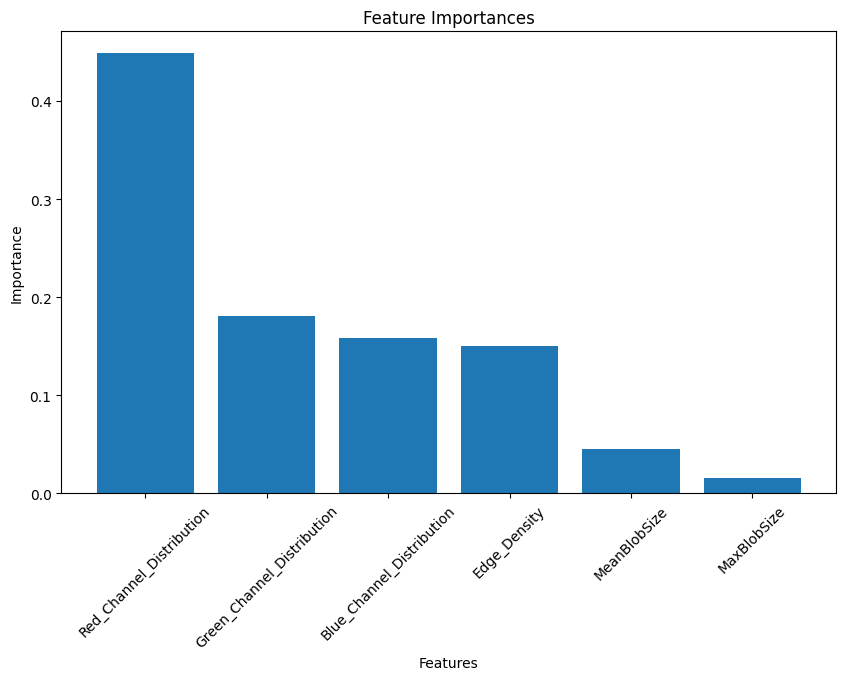

Important features in predicting infected or uninfected:
Red_Channel_Distribution: 0.4485
Green_Channel_Distribution: 0.1811
Blue_Channel_Distribution: 0.1583
Edge_Density: 0.1507
MeanBlobSize: 0.0454
MaxBlobSize: 0.0160


In [53]:
import matplotlib.pyplot as plt

# Get the column names from the original DataFrame
feature_names = ['Red_Channel_Distribution',
       'Green_Channel_Distribution', 'Blue_Channel_Distribution',
       'Edge_Density', 'MeanBlobSize', 'MaxBlobSize']

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_eda_train, y_eda_train)

# Evaluate the feature importances
feature_importances = clf.feature_importances_

# Sort feature importances and feature names in descending order
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, sorted_feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

# Print the feature importances
print(f'Important features in predicting infected or uninfected:')

for feature, importance in zip(feature_names, sorted_feature_importances):
    print(f'{feature}: {importance:.4f}')



### From the graph it is evident that Red_Channel_Distribution, Green_Channel_Distribution, Blue_Channel_Distribution, Edge_density have a significant role to play in identifying if a cell is infected or not. Where as the MeanBlobSize and MaxBlobSize do not affect that much in comparison to the other features.

### RF model design and predicted accuracy

### RF model design for analyzing EDA dataset

In [54]:
from sklearn.feature_selection import SelectFromModel

# Specify the importance threshold
importance_threshold = 0.10

# Create a SelectFromModel transformer
sfm = SelectFromModel(clf, threshold=importance_threshold)

# Fit and transform the training data
X_eda_train_selected = sfm.fit_transform(X_eda_train, y_eda_train)

# Transform the test data
X_eda_test_selected = sfm.transform(X_eda_test)

# Train a Random Forest classifier on the selected features
clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_eda_train_selected, y_eda_train)

# Make predictions on the test data using the selected features
y_eda_pred_selected = clf_selected.predict(X_eda_test_selected)

# Calculate and print the accuracy for the selected features
accuracy_selected = accuracy_score(y_eda_test, y_eda_pred_selected)
print(f'Accuracy with selected features: {accuracy_selected:.2f}')

# You can also print a classification report for more detailed metrics
report_selected = classification_report(y_eda_test, y_eda_pred_selected)
print(report_selected)


Accuracy with selected features: 0.89
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       750
           1       0.90      0.88      0.89       750

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



### This clearly indicates that the model is able to predict 89% accurately whether a cell is infected or not with the features - 'Red_Channel_Distribution','Green_Channel_Distribution', 'Blue_Channel_Distribution','Edge_Density'. The features 'MeanBlobSize' & 'MaxBlobSize' were not considered as its importance is less significant with respect to other data.

In [55]:
import h5py
import joblib
import sklearn

# Save the trained Random Forest model to an HDF5 file
model_filename = 'random_forest_model.h5'

# Create an HDF5 file
with h5py.File(model_filename, 'w') as file:
    # Store the model in the HDF5 file
    file.create_group('model')
    model_group = file['model']
    model_group.attrs['scikit-learn_version'] = sklearn.__version__  # Store scikit-learn version
    
    # Save the model using joblib (without specifying a compression method)
    joblib.dump(clf_selected, model_filename)


### Testing if the model can predict if an image is infected or not with Random Forest algorithm

In [56]:
import cv2
import os
import numpy as np
from skimage.feature import blob_log
import pandas as pd

# Define the path to the folder containing the images for RGB channel distribution
image_folder_path = '../new_direction/Dataset/cell_images/Uninfected/'

# Choose one image filename for analysis 
image_filename = 'C100P61ThinF_IMG_20150918_144104_cell_131.png'

# Construct the full path to the chosen image
image_path = os.path.join(image_folder_path, image_filename)

# Load the selected image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Function to calculate blob features from an RGB image
def calculate_blob_features(image):
    # Detect blobs using the Laplacian of Gaussian (LoG) method on the RGB image
    blobs = blob_log(image, max_sigma=30, threshold=0.02)
    
    # If no blobs are found, return zeros
    if len(blobs) == 0:
        return [0, 0]
    
    # Extract blob sizes (radii)
    blob_sizes = blobs[:, 2]
    
    # Calculate mean and max blob sizes
    mean_blob_size = np.mean(blob_sizes)
    max_blob_size = np.max(blob_sizes)
    
    return [mean_blob_size, max_blob_size]

# Function to calculate edge density from an image
def calculate_edge_density(image):
    # Convert the image to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Detect edges using the Canny edge detector
    edges = cv2.Canny(image_gray, threshold1=30, threshold2=100)
    
    # Calculate edge density
    total_pixels = image_gray.size
    edge_pixels = np.count_nonzero(edges)
    edge_density = edge_pixels / total_pixels
    
    return edge_density

# Function to calculate average RGB values from an image
def calculate_average_rgb(image):
    red_mean = np.mean(image[:, :, 0])
    green_mean = np.mean(image[:, :, 1])
    blue_mean = np.mean(image[:, :, 2])
    return red_mean, green_mean, blue_mean

# Calculate blob features, edge density, and average RGB values for the selected image
blob_features = calculate_blob_features(image_rgb)
edge_density = calculate_edge_density(image_rgb)
red_mean, green_mean, blue_mean = calculate_average_rgb(image_rgb)

# Create a DataFrame to store the analysis results
data = {
    'ImageFileName': [image_filename],
    'MeanBlobSize': [blob_features[0]],
    'MaxBlobSize': [blob_features[1]],
    'EdgeDensity': [edge_density],
    'RedChannelMean': [red_mean],
    'GreenChannelMean': [green_mean],
    'BlueChannelMean': [blue_mean],
    'Target' : 0
}

analysis_df = pd.DataFrame(data)

# Print the analysis DataFrame
analysis_df


,ImageFileName,MeanBlobSize,MaxBlobSize,EdgeDensity,RedChannelMean,GreenChannelMean,BlueChannelMean,Target
0,C100P61ThinF_IMG_20150918_144104_cell_131.png,0.344828,2.0,0.020081,155.058418,114.515112,109.725558,0


In [57]:
# setting features to be analyzed by Random Forest model
X_file_test = analysis_df.drop(['ImageFileName','Target'],axis = 1).values

In [58]:
# setting the dependent variable for Random Forest Model
y_file_test = analysis_df['Target'].values

In [59]:
# Standardizing and fitting the data with Random Forest model and predicting the value
scaler = StandardScaler()
X_eda_train = scaler.fit_transform(X_eda_train) 

X_file_test = scaler.transform(X_file_test)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_file_test, y_file_test)

y_file_pred = classifier.predict(X_file_test)

In [60]:
#predicted value as an output array
y_file_pred

array([0])

In [61]:
# classifying the image where if value is less than 0.5 it is uninfected and greater than 0.5 it is infected
if y_file_pred < 0.5: 
    print(f'Predicted class is uninfected')
else:
    print(f'Predicted class is Infected')

Predicted class is uninfected


### Generating prediction values with CNN and RF models. The prediction of 'Target' values will be done on the testing datasets for uninfected and infected datasets, so that we can compare if the model is working efficiently.

### Generating values CNN values for the uninfectedtest dataset

In [62]:
# import related depencies that are required
from keras.models import load_model
from keras.preprocessing import image

In [63]:
# Function to preprocess an image (shrinking size of image and normalizing it)
def preprocess_image(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(25, 25)) 
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize pixel values as RGB values range from 0 to 255
    return img

In [64]:
# creating a list to add cnn predicted values
cnn_predictions=[]

In [65]:
# Define the file path to the image folder
image_test_uninf = os.path.join('..','this_way','clean','test','uninfected_processed')

# Iterate through the 'image_name' column and make predictions
for image_name in test_eda_uninf_df['ImageFileName']:
    image_path = os.path.join(image_test_uninf, image_name)  # Replace with the actual path
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    cnn_predictions.append(prediction[0][0])  # Assuming the model output is a single value

1/1 [==============================] - 0s 18ms/step


In [66]:
# Engineering a column CNN_predictions to store cnn_predictions in uninfected dataset
test_eda_uninf_df['CNN_predictions'] = np.round(cnn_predictions)

In [67]:
# review the test_eda_uninf_df 
test_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0,1.0
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0,0.0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0,0.0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0,1.0
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0,0.0


### Generating values CNN values for infected dataset

In [68]:
# reset the cnn_predictions list 
cnn_predictions=[]

In [69]:
# Define the file path to the image folder
image_test_inf = os.path.join('..','this_way','clean','test','infected_processed')

# Iterate through the 'image_name' column and make predictions
for image_name in test_eda_inf_df['ImageFileName']:
    image_path = os.path.join(image_test_inf, image_name) 
    preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    cnn_predictions.append(prediction[0][0])  # Assuming the model output is a single value

1/1 [==============================] - 0s 25ms/step


1/1 [==============================] - 0s 20ms/step


In [70]:
# Engineering a column CNN_predictions to store cnn_predictions in infected dataset
test_eda_inf_df['CNN_predictions'] = np.round(cnn_predictions)

In [71]:
# review the test_eda_inf_df 
test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1,1.0
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1,1.0
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1,1.0
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1,1.0
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1,1.0


In [72]:
#Confirming CNN_predictions in the dataset
test_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0,1.0
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0,0.0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0,0.0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0,1.0
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0,0.0


In [73]:
# preparing X_eda_uninf_test for RF model to generate RF_predictions
X_eda_uninf_test = test_eda_uninf_df.drop(['ImageFileName','Target','CNN_predictions','MeanBlobSize','MaxBlobSize'],axis = 1).values

In [74]:
# predicting values for uninfected dataset using RF model
uninf_predicted_values = clf_selected.predict(X_eda_uninf_test)

In [75]:
# storing RF model predicted values in the test_eda_uninf_df dataframe
test_eda_uninf_df["RF_predicted"] = uninf_predicted_values
test_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions,RF_predicted
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0,1.0,0
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0,0.0,0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0,0.0,0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0,1.0,0
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0,0.0,0


In [76]:
test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1,1.0
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1,1.0
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1,1.0
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1,1.0
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1,1.0


In [77]:
# Engineering a column named "Predictions" which has 60% weightage of CNN_predictions and 40% of RF_predicted values
test_eda_uninf_df["Predictions"] = 0.6*(test_eda_uninf_df["CNN_predictions"]+test_eda_uninf_df["RF_predicted"]*0.4)

0.54

In [78]:
test_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions,RF_predicted,Predictions
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0,1.0,0,0.6
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0,0.0,0,0.0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0,0.0,0,0.0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0,1.0,0,0.6
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0,0.0,0,0.0


In [79]:
test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1,1.0
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1,1.0
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1,1.0
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1,1.0
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1,1.0


In [80]:
# Preparing data for RF_model
X_eda_inf_test = test_eda_inf_df.drop(['ImageFileName','Target','CNN_predictions','MeanBlobSize','MaxBlobSize'],axis = 1).values

# predicting values of the infected dataset using the RF_model 
inf_predicted_values = clf_selected.predict(X_eda_inf_test)

# assigning the RF_predicted values to a column in the test_eda_inf_df
test_eda_inf_df["RF_predicted"] = inf_predicted_values

test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions,RF_predicted
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1,1.0,0
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1,1.0,1
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1,1.0,1
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1,1.0,1
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1,1.0,1


In [81]:
# Engineering a column named "Predictions" which has 60% weightage of CNN_predictions and 40% of RF_predicted values
test_eda_inf_df["Predictions"] = 0.6*(test_eda_inf_df["CNN_predictions"]+test_eda_inf_df["RF_predicted"]*0.4)

In [82]:
# A function which replaces the values as 0 if it is less than or equal to  0.5 and 1 if the value exceeds 0.5
def replace_column_values(df, column_name):
    new_df = df.copy()  # Create a copy of the input DataFrame to avoid modifying it
    new_df[column_name] = new_df[column_name].apply(lambda x: 0 if x < 0.5 else 1)
    return new_df

In [83]:
# running replace_column_values on the uninfected and infected datasets
test_eda_uninf_df = replace_column_values(test_eda_uninf_df, 'Predictions')
test_eda_inf_df = replace_column_values(test_eda_inf_df,'Predictions')
test_eda_inf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions,RF_predicted,Predictions
0,C131P92ThinF_IMG_20151004_151001_cell_119.png,162.9456,121.9120,117.5216,0.1376,1.000000,1.0,1,1.0,0,1
1,C131P92ThinF_IMG_20151004_151001_cell_120.png,143.6416,89.4432,96.8192,0.2064,1.333333,2.0,1,1.0,1,1
2,C131P92ThinF_IMG_20151004_151001_cell_121.png,138.9328,90.3376,95.4704,0.2560,0.000000,0.0,1,1.0,1,1
3,C131P92ThinF_IMG_20151004_151001_cell_123.png,156.3904,107.8592,104.9968,0.1824,1.000000,1.0,1,1.0,1,1
4,C131P92ThinF_IMG_20151004_151001_cell_126.png,126.0768,72.1520,87.3760,0.2512,2.000000,2.0,1,1.0,1,1


In [84]:
test_eda_uninf_df.head()

,ImageFileName,Red_Channel_Distribution,Green_Channel_Distribution,Blue_Channel_Distribution,Edge_Density,MeanBlobSize,MaxBlobSize,Target,CNN_predictions,RF_predicted,Predictions
0,C137P98ThinF_IMG_20151005_160256_cell_35.png,145.6576,102.2960,101.2288,0.1312,0.000000,0.0,0,1.0,0,1
1,C137P98ThinF_IMG_20151005_160256_cell_45.png,151.9232,111.8080,107.6320,0.1280,1.333333,2.0,0,0.0,0,0
2,C137P98ThinF_IMG_20151005_160918_cell_21.png,156.8752,119.7184,113.8016,0.1200,1.000000,1.0,0,0.0,0,0
3,C137P98ThinF_IMG_20151005_160918_cell_22.png,124.8928,89.2848,90.0928,0.1440,1.000000,2.0,0,1.0,0,1
4,C137P98ThinF_IMG_20151005_160918_cell_42.png,143.8432,108.3776,106.6576,0.1392,1.333333,2.0,0,0.0,0,0


In [85]:
# Count the number of times '1' appears in the 'Predictions' column in the uninfected dataset.
count_of_ones = (test_eda_uninf_df['Predictions'] == 1).sum()

print(f'Number of times 1 appeared in Predictions column in uninfected dataset: {count_of_ones}')

Number of times 1 appeared in Predictions column in uninfected dataset: 158


In [86]:
# Count the number of times '0' appears in the 'Predictions' column in the infected dataset
count_of_zero = (test_eda_inf_df['Predictions'] == 0).sum()

print(f'Number of times 0 appeared in Predictions column in infected dataset: {count_of_zero}')

Number of times 0 appeared in Predictions column in infected dataset: 13


In [87]:
#Calculating efficiency of the predictions against observed values
total_inf_test = len(test_eda_inf_df)
total_uninf_test = len(test_eda_uninf_df)

# Efficiency of predicting uninfected 
eff_uninf = np.round((1 - count_of_ones/total_uninf_test)*100,2)

# Efficiency of predicting infected
eff_inf = np.round((1 - count_of_zero/total_inf_test)*100,2)

print(f"Effciency of predicting uninfected by both models is {eff_uninf} %")
print(f"Effciency of predicting infected by both models is {eff_inf} %")

Effciency of predicting uninfected by both models is 78.93 %
Effciency of predicting infected by both models is 98.27 %


In [88]:
#Getting the dataframe into a format which will aid in web app design
final_uninf_df = test_eda_uninf_df[['ImageFileName','Target','Predictions']]
final_inf_df = test_eda_inf_df[['ImageFileName','Target','Predictions']]

In [89]:
#exporting the csv file
final_uninf_df.to_csv('Unifected_test_post_ML.csv')
final_inf_df.to_csv('Infected_test_post_ML.csv')